In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("spotify.csv")

In [3]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [4]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

# 1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needfull.

In [5]:
df.duplicated().sum()

27

In [8]:
df = df.drop_duplicates()

In [9]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

In [12]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [14]:
len(df["Track Name"].unique())

412

In [15]:
len(df["Popularity"].unique())

51

In [18]:
X = df.groupby("Track Name")["Popularity"].max().sort_values(ascending=False).reset_index()

In [19]:
X

,Track Name,Popularity
0,Lovin On Me,97
1,CARNIVAL,96
2,redrum,96
3,FE!N (feat. Playboi Carti),93
4,Prada,92
...,...,...
407,911 (feat. Mary J. Blige),48
408,On Me - Remix,47
409,Splash Brothers,44
410,Intentions,35


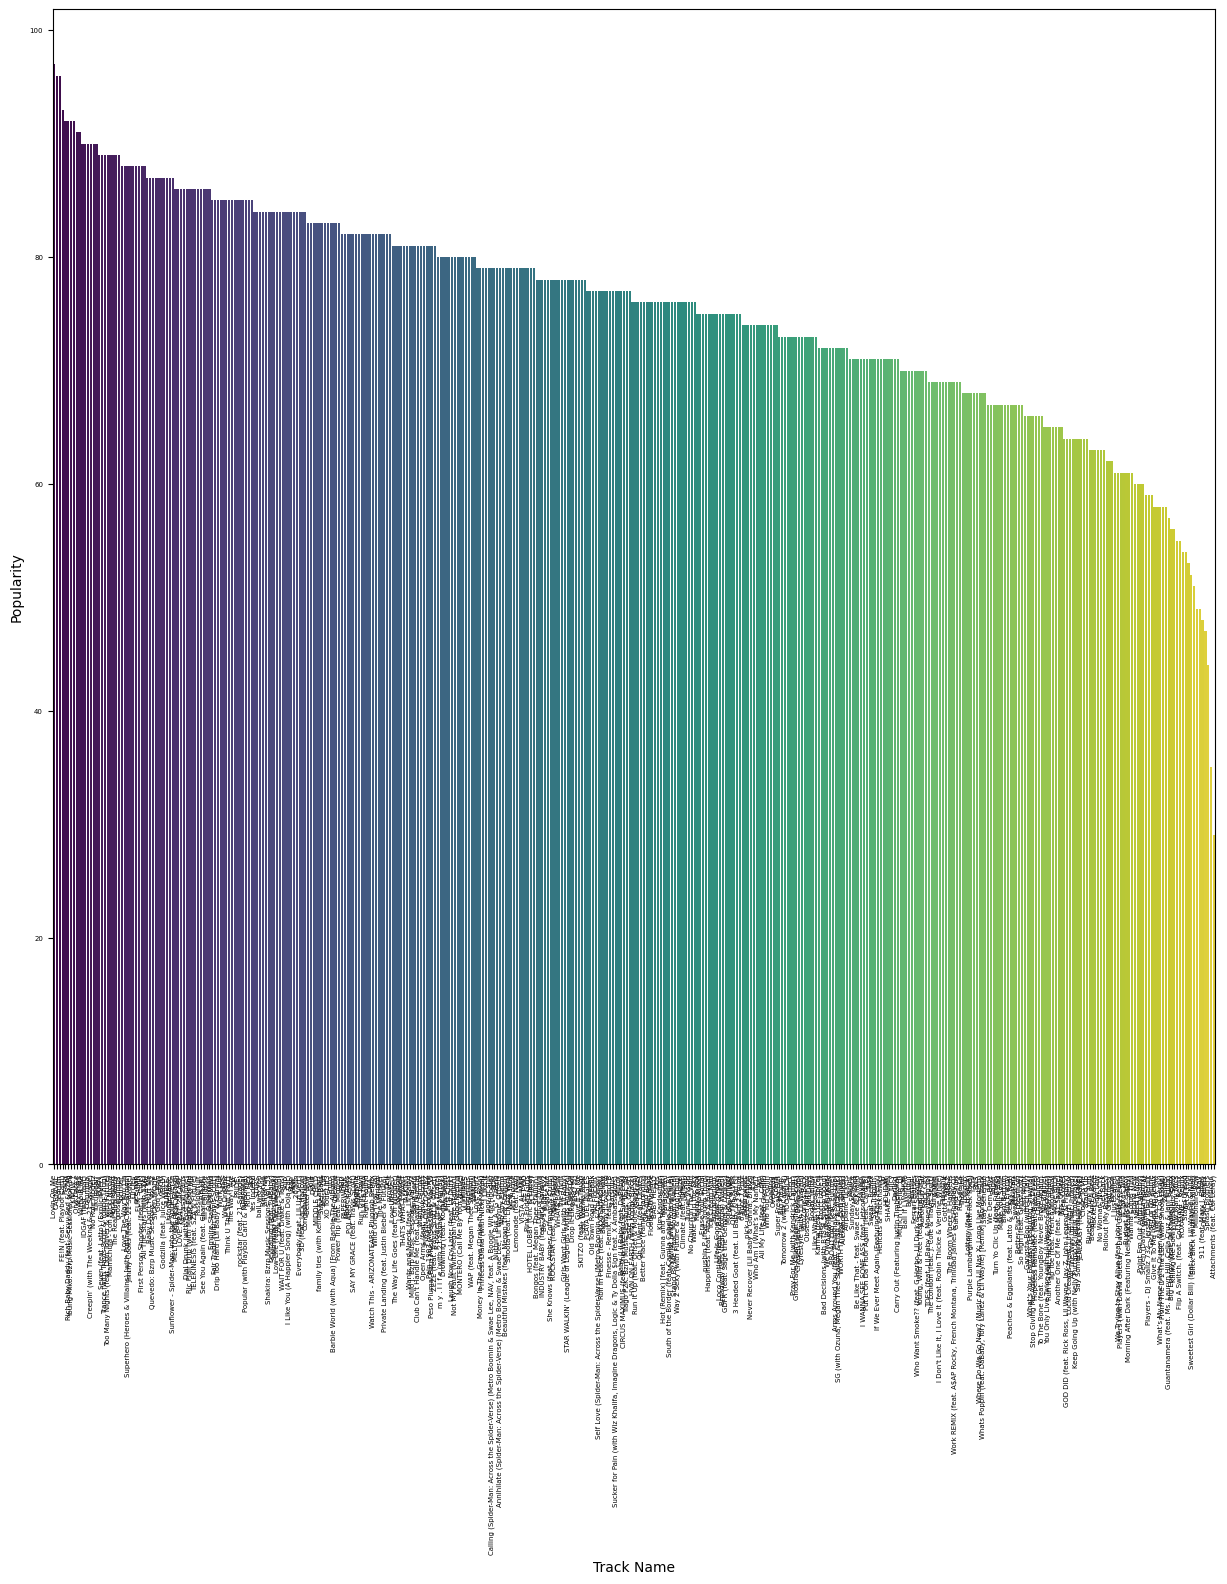

In [26]:
plt.figure(figsize = (15,15))
sns.barplot(x = X["Track Name"], y =  X["Popularity"] , data=X, palette = 'viridis')

# Adjust the fontsize of x and y labels
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

plt.xticks(rotation = 90)
plt.show()


# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

In [22]:
fig = px.scatter(X, x='Popularity', y='Track Name')
fig.show()


# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

In [27]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [29]:
cross_tab = pd.crosstab(df['Artist'],df['Track ID'],normalize= True)

In [30]:
cross_tab

Track ID,00p23Uw776hxaIGNWL9S1Y,01CHrTerCzyRpMI1MzQ4fz,01qFKNWq73UfEslI0GvumE,02xkg0KUfiytfbnwAevy1p,04CyMEHliadfQWMUJb1w99,0AAMnNeIc6CdnfNU85GwCH,0B8QzDH7YWih85V5SEMnyJ,0CAfXk7DXMnon4gLudAp7J,0EhuGnOS6fTc5l5UNtDEH2,0F7FA14euOIX8KcbEturGH,...,7m9XR7FquXLP1FewdAcNS9,7qLr3HMApUbyDkUvgIvHnB,7qTaDOcld0VmBWXnkbUj45,7qje9qxLncMESiPeI27SAn,7r6PigmGzlB3YPB7wvBBbi,7sO5G9EABYOXQKNPNiE9NR,7xQAfvXzm3AkraOtGPWIZg,7xVLFuuYdAvcTfcP3IG3dS,7yfRb4seXT7w8zVMW0dXNa,7ytR5pFWmSjzHJIeQkgog4
Artist,,,,,,,,,,,,,,,,,,,,,
*NSYNC,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2 Chainz,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
21 Savage,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
A Boogie Wit da Hoodie,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
A$AP Ferg,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.002421,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Nudy,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Young Thug,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.002421,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
benny blanco,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [33]:
cross_tab = pd.crosstab(df['Track Name'],df['Artist'])

In [34]:
cross_tab

Artist,*NSYNC,2 Chainz,21 Savage,A Boogie Wit da Hoodie,A$AP Ferg,ATL Jacob,Anuel AA,Arizona Zervas,Baby Keem,BigXthaPlug,...,Tyga,Wiz Khalifa,Wyclef Jean,XXXTENTACION,Yeat,Young Nudy,Young Thug,benny blanco,cassö,¥$
Track Name,,,,,,,,,,,,,,,,,,,,,
20 Min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3 Headed Goat (feat. Lil Baby & Polo G),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3D (feat. Jack Harlow),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4:44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6 Foot 7 Foot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pop ur shit,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
prove it,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pushin P (feat. Young Thug),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


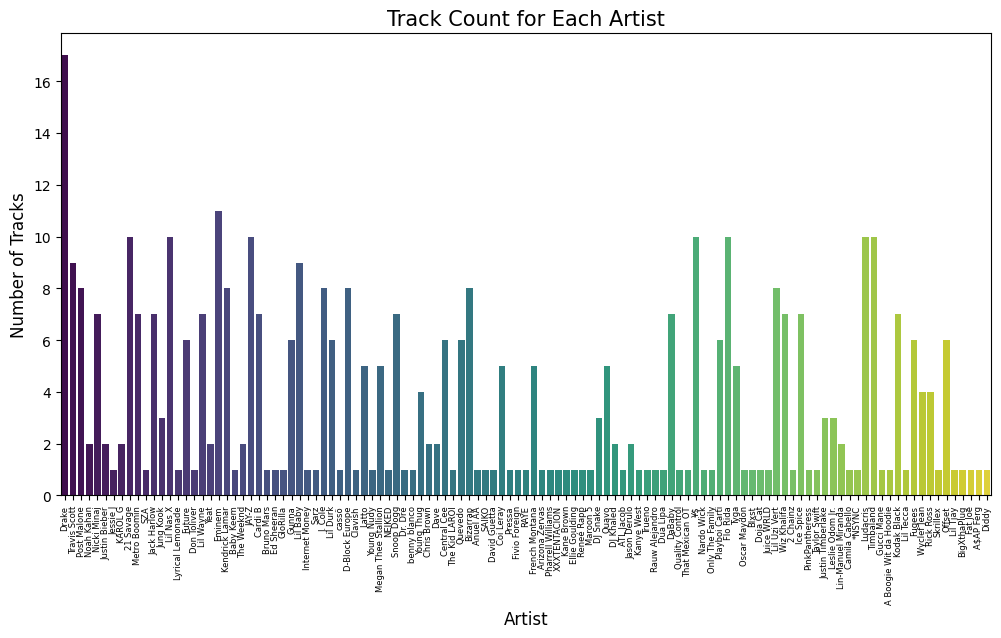

In [42]:
# Display the count of tracks for each artist using a countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Artist', data=df, palette='viridis')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=90, fontsize=6)

# Show the plot
plt.title("Track Count for Each Artist", fontsize=15)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Number of Tracks", fontsize=12)
plt.show()



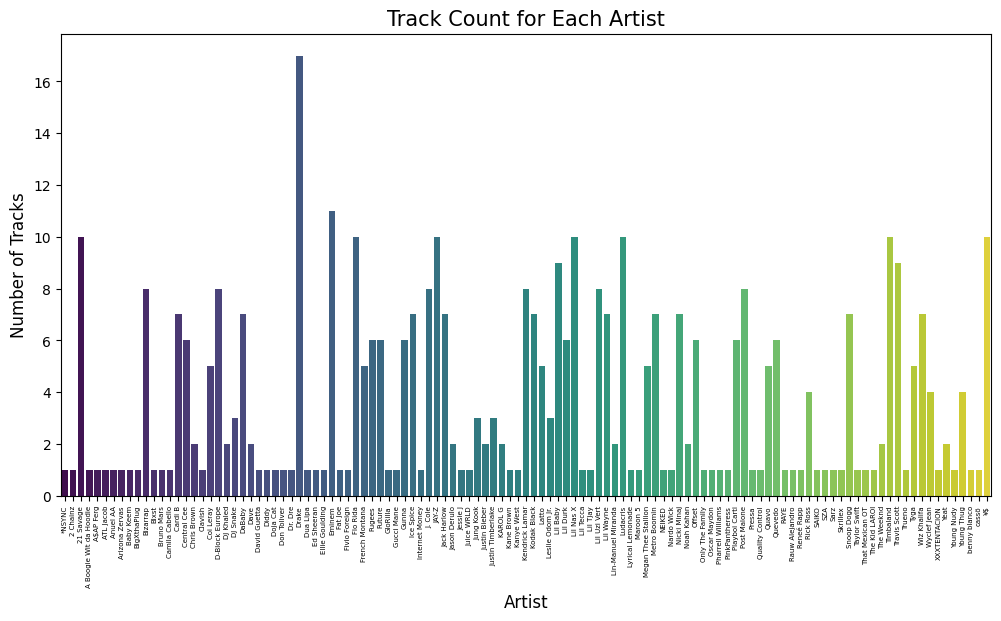

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sum the occurrences across rows to get the track count for each artist
artist_track_count = cross_tab.sum(axis=0)

# Create a bar plot for track count per artist
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_track_count.index, y=artist_track_count.values, palette='viridis')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=90, fontsize=5)

# Show the plot
plt.title("Track Count for Each Artist", fontsize=15)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Number of Tracks", fontsize=12)
plt.show()


# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [43]:
# Sort the dataset by popularity in ascending order to get least popular tracks
least_popular_tracks = df.sort_values(by='Popularity').head(5)

# Display the Track Name, Artist, and Popularity for the top 5 least popular tracks
least_popular_tracks = least_popular_tracks[['Track Name', 'Artist', 'Popularity']]

print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)


Top 5 Least Popular Tracks:
                        Track Name          Artist  Popularity
207  Attachments (feat. Coi Leray)          Pressa          29
231                     Intentions   Justin Bieber          35
413                Splash Brothers  French Montana          44
225                  On Me - Remix        Lil Baby          47
407      911 (feat. Mary J. Blige)     Wyclef Jean          48


# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artis.

In [53]:
artist_popularity = df.groupby('Artist')['Popularity'].sum().sort_values(ascending=False)

top_5_artists = artist_popularity.head(5)

most_popular_tracks = df[df['Artist'].isin(top_5_artists.index)].groupby('Artist').apply(lambda x: x.loc[x['Popularity'].idxmax(), 'Track Name'])
print("Most Popular Tracks for Top 5 Most Popular Artists:")
print(most_popular_tracks)


Most Popular Tracks for Top 5 Most Popular Artists:
Artist
21 Savage                                     redrum
Drake        Rich Baby Daddy (feat. Sexyy Red & SZA)
Eminem                                    Without Me
Flo Rida                          Low (feat. T-Pain)
¥$                                          CARNIVAL
dtype: object


#

# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violine plot.

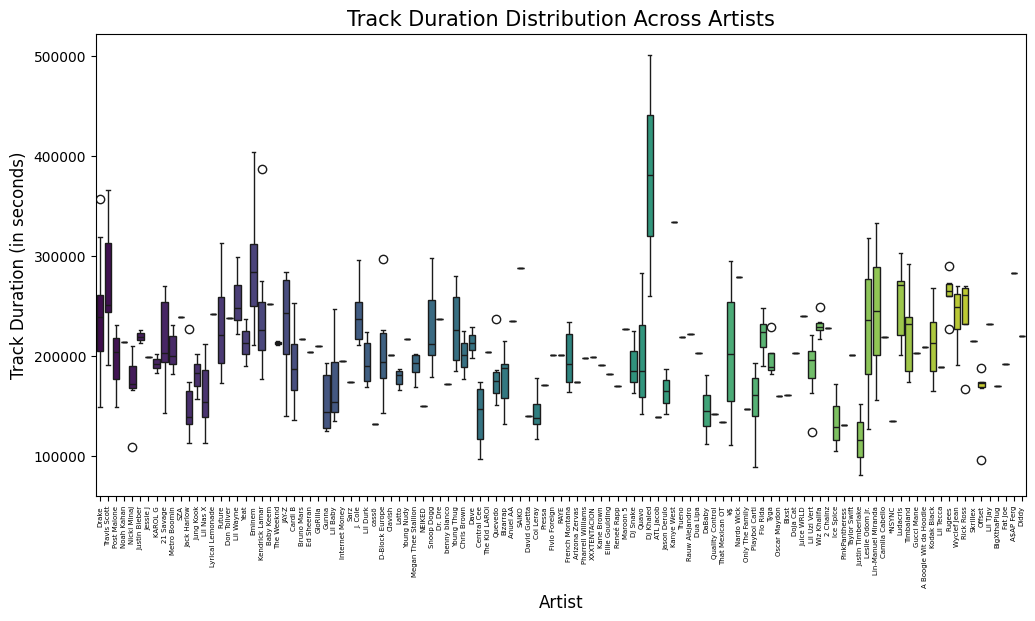

In [49]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Artist', y='Duration (ms)' , data=df, palette='viridis')

plt.xticks(rotation=90, fontsize=5)

plt.title("Track Duration Distribution Across Artists", fontsize=15)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Track Duration (in seconds)", fontsize=12)
plt.show()


# 10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

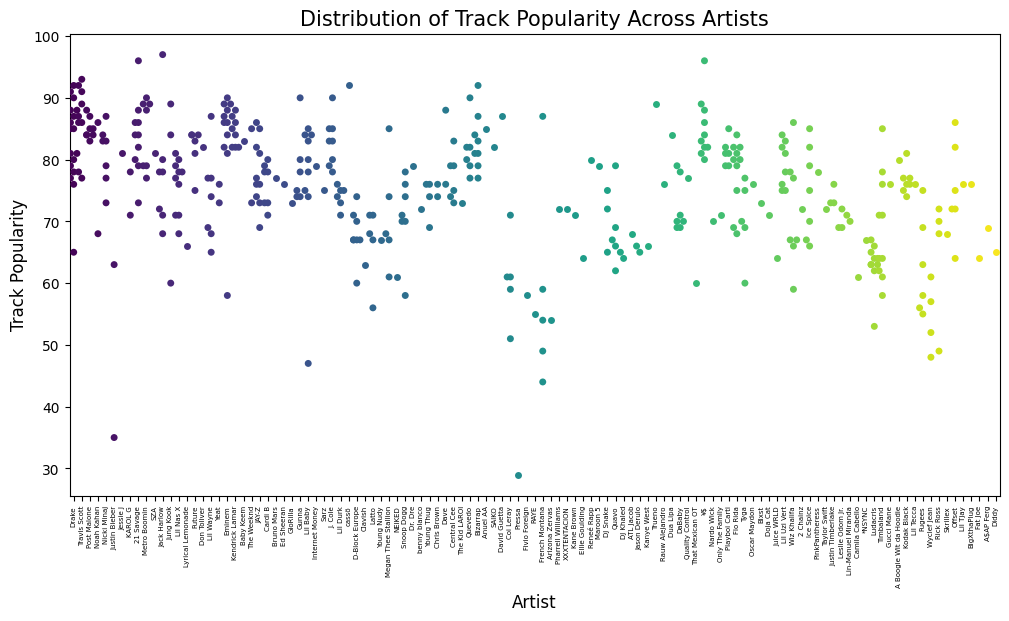

In [54]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=df, palette='viridis')

plt.xticks(rotation=90, fontsize=5)

plt.title("Distribution of Track Popularity Across Artists", fontsize=15)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Track Popularity", fontsize=12)
plt.show()
